In [1]:
import awkward as ak
import hist
import numpy as np

import pylhe

In [2]:
pylhe.register_awkward()
arr = pylhe.to_awkward(pylhe.read_lhe_with_attributes("unweighted_events.lhe"))
arr

<EventArray [{eventinfo: {nparticles: 4, ... ] type='10000 * Event["eventinfo": ...'>

In [3]:
hist1 = hist.Hist.new.Reg(100, 50, 150).Int64()
hist1.fill((arr.particles.vector[:, -1] + arr.particles.vector[:, -2]).mass)

Hist(Regular(100, 50, 150, label='Axis 0'), storage=Int64()) # Sum: 7860.0 (10000.0 with flow)

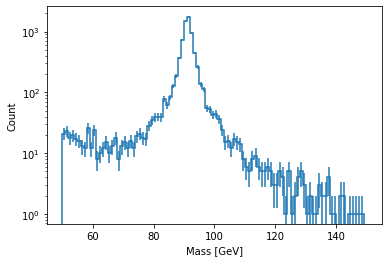

In [4]:
artists = hist1.plot1d()
ax = artists[0].stairs.axes
ax.set_yscale("log")
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("Count");